# Importing Necessary Libraries:

Numpy and Pandas: For numerical operations and data manipulation.
Scikit-learn: For data splitting and preprocessing.
TensorFlow/Keras: For building and training the deep learning model.
Matplotlib: For plotting the model's performance.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
# Load the dataset
file_path = 'balanced_hatespeech_dataset.csv'
df = pd.read_csv(file_path) 

# Separate features and target

In [3]:
# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Verify unique values in original labels

In [4]:
# Verify unique values in original labels
print("Unique values in original labels:", y.unique())

Unique values in original labels: ['N' 'P']


# Encode categorical labels

In [5]:
# Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Verify the unique values in y_encoded

In [6]:
# Verify the unique values in y_encoded
print("Unique encoded labels:", np.unique(y_encoded))

Unique encoded labels: [0 1]


# Split the data into training and test sets

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Verify unique values in y_train and y_test after split

In [8]:
# Verify unique values in y_train and y_test after split
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


# Convert the DataFrame to numpy arrays

In [9]:
# Convert the DataFrame to numpy arrays if necessary
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Pad sequences to ensure uniform input length

In [10]:
# Pad sequences to ensure uniform input length
max_sequence_length = 100  # Adjust based on your data
X_train_padded = pad_sequences(X_train, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_sequence_length, padding='post')

# Convert labels to categorical (one-hot encoding)

In [11]:
# Convert labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

# Build the BiLSTM model

In [12]:
# Build the BiLSTM model
model = Sequential()
model.add(Embedding(input_dim=X_train_padded.shape[1], output_dim=100))  # Adjust input_dim and output_dim based on your embeddings
model.add(Bidirectional(LSTM(units=64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

In [13]:
# Train the model
history = model.fit(X_train_padded, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 610s 704ms/step - accuracy: 0.4973 - loss: 0.6943 - val_accuracy: 0.5092 - val_loss: 0.6921
Epoch 2/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 607s 801ms/step - accuracy: 0.5241 - loss: 0.6901 - val_accuracy: 0.5355 - val_loss: 0.6910
Epoch 3/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 498s 657ms/step - accuracy: 0.5389 - loss: 0.6854 - val_accuracy: 0.5497 - val_loss: 0.6808
Epoch 4/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 461s 608ms/step - accuracy: 0.5446 - loss: 0.6814 - val_accuracy: 0.5464 - val_loss: 0.6787
Epoch 5/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 472s 621ms/step - accuracy: 0.5563 - loss: 0.6775 - val_accuracy: 0.5553 - val_loss: 0.6776
Epoch 6/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 527s 653ms/step - accuracy: 0.5520 - loss: 0.6760 - val_accuracy: 0.5566 - val_loss: 0.6760
Epoch 7/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 517s 681ms/step - accuracy: 0.5614 - loss: 0.6740 - val_accuracy: 0.5655 - val_loss: 0.6793
Epoch 8/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 549s 723ms/step - accuracy: 0.5596 -

# Evaluate the model

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_categorical, verbose=1)
print(f'Accuracy: {accuracy}')

237/237 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.5590 - loss: 0.6767
Accuracy: 0.5645288825035095


# Plot accuracy and loss over epochs

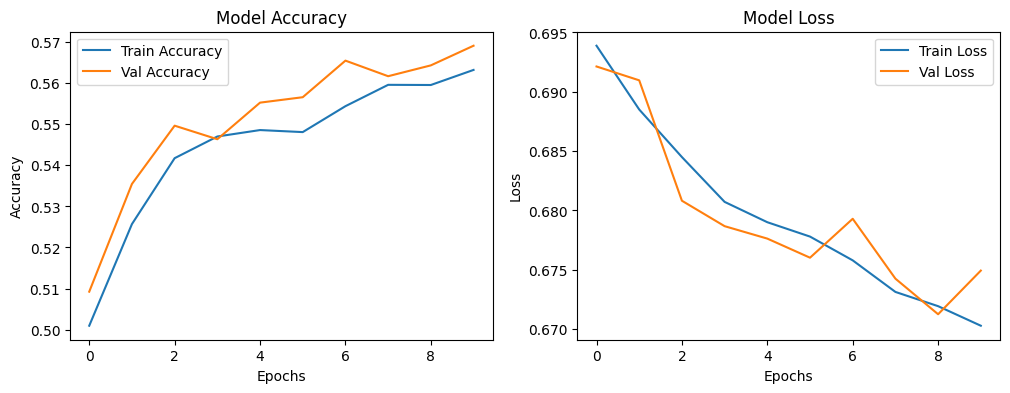

In [15]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()